**[Plotting Probabilities Using Matplotlib](https://livebook.manning.com/book/data-science-bookcamp/chapter-2/v-5/1)**

> datasbook01 <> sharklasers.com 123456

This section covers:
- Creating simple plots using Matplotlib.
- Labeling plotted data.
- What is a probability distribution?
- Plotting and comparing multiple probability distributions.

**Python Matplotlib library**, which is fully optimized for outputting high-caliber plots and data visualizations.In this section, we will leverage Matplotlib to better comprehend the coin-flip probabilities that we computed in Section One.

# Basic Matplotlib Plots

Install *Matplotlib* library on our virtual environment:
```
pip install matplotlib
```

Importing Matplotlib:

In [5]:
import matplotlib.pyplot as plt

Plotting a linear relationship:

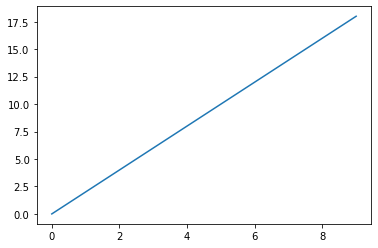

In [6]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

Plotting individual data-points:

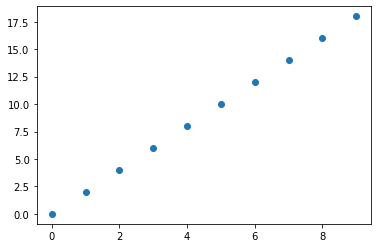

In [7]:
plt.scatter(x, y)
plt.show()

Shading an interval beneath a connected plot:

In [9]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

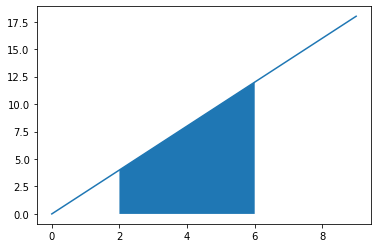

In [12]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

Exposing individual coordinates within a continuous plot. A connected plot and a scatter plot combined together with a shaded interval. The individual integers in the plot appear as points marking a smooth, indivisible line.

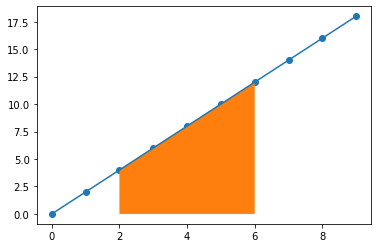

In [17]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

Furthermore, no data plot is ever truly complete without descriptive x-axis and y-axis labels. 

Adding axes labels:

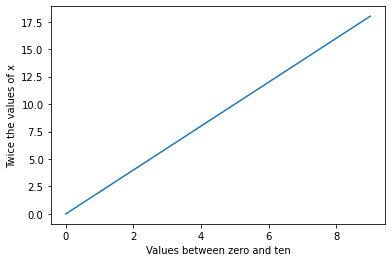

In [19]:
plt.plot(x, y)
plt.xlabel("Values between zero and ten")
plt.ylabel("Twice the values of x")
plt.show()

**Common Matplotlib method calls**